# Project: Car mortality, alcohol consumption and gasoline prices in selected EU countries. Historical trends and relations

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#exploratoryI">Exploratory Data Analysis I</a></li>
<li><a href="#datacleanII">Further data cleaning</a></li>
<li><a href="#exploII">Exploratory Data Analysis II</a></li>
<li><a href="#conclusions">Conclusions</a></li>

</ul>

<a id='intro'></a>
## Introduction

As part of the Udacity Data Analysis Nanodegree, this project will perform some data cleaning and analysis operations on a dataset in order to get some preliminary observations. 
I will investigate the relation between car mortality, alcohol consumption and gasoline prices at the pump in some countries of the European Union.  
In particular, we will try to find an answer to the following questions:

1) What has been the historical trend with regard to car deaths, alcohol consumption and gasoline prices in the selected countries? 

2) Can changes in alcohol consumption and gasoline prices predict the change mortality rate in car accidents (limited to the most recent year with data available)? 

More detail will be provided in the following sections of this document. The data used were downloaded from <a href="https://www.gapminder.org/data/"> Gapminder</a>, a repository of global indicators.
In particular, the following datasets were used:

|Dataset |Source   |link
|------|------|
|Pump price for gasoline (US$ per liter) |World Bank, World Development Indicators|<a href="https://docs.google.com/spreadsheet/pub?key=pyj6tScZqmEdz8B4njtoHPA&output=xlsx">link</a>
|Alcohol consumption per adult 15+ (litres) |WHO   |<a href="https://docs.google.com/spreadsheet/pub?key=0AgogXXPMARyldGJqTDRfNHBWODJMRWlZaVhNclhNZXc&output=xlsx">link</a>
|Car deaths (per 100,000 people)|GMID and WHO, adjusted by gapminder    |<a href="https://docs.google.com/spreadsheet/pub?key=tLf-4GD5z0QxqsDoUz4vOlg&output=xlsx">link</a>

More details on each dataset are provided in the .xlsx files storing the data. For the purpose of this exercise, the .xlsx files were preliminary converted into .csv with Microsoft Excel.

As it will also be reminded below, this exercise is aimed to practice with data analysis flows in Python, and hence any result and conclusion has to be considered purely tentative.    


<a id='wrangling'></a>
## Data Wrangling

### General Properties
In general terms, the datasets used present some challenges in terms of completeness and comparability, as measurements were taken in different years for the different indicators, and even for the same indicator according to the country. This mean that only a few countries have the same indicator collected in the same years. We can check the first rows and a random selection of rows of the three datasets joined together can give a better undestanding of the problem:    

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
from IPython.display import display, HTML

# load the datasets
alcohol = (pd.read_csv('alcohol_consumption.csv', sep=";", encoding='latin-1', index_col=0)).stack()
car = (pd.read_csv('car_RTI_age_adjusted.csv', sep=";", encoding='latin-1', index_col=0)).stack()
gas = (pd.read_csv('EP_PMP_SGAS_CD.csv', sep=";", encoding='latin-1', index_col=0)).stack()

# join the datasets in a single dataframe
frames=[alcohol, car, gas]
datafr = pd.concat(frames, keys=['alcohol', 'car', 'gas'], axis=1)

display(datafr.head(20))
display(datafr.sample(20))

alcohol       car   gas
Afghanistan 2002      NaN       NaN  0.34
            2004      NaN       NaN  0.53
            2005     0.02       NaN   NaN
            2006      NaN       NaN  0.68
            2008     0.03       NaN   NaN
Albania     1998      NaN       NaN  0.86
            2000      NaN       NaN  0.57
            2002      NaN       NaN  0.80
            2004      NaN       NaN  1.23
            2005     6.68       NaN   NaN
            2006      NaN  5.977778  1.44
            2008     7.29       NaN   NaN
Algeria     1991      NaN       NaN  0.15
            1993      NaN       NaN  0.20
            1995      NaN       NaN  0.40
            1998      NaN       NaN  0.31
            2000      NaN       NaN  0.27
            2002      NaN       NaN  0.22
            2004      NaN       NaN  0.32
            2005     0.96       NaN   NaN

,,alcohol,car,gas
Bulgaria,2002,NaN,NaN,0.68
Sudan,2005,2.56,NaN,NaN
Virgin Islands (U.S.),2002,NaN,1.612,NaN
New Zealand,2005,9.62,8.433,NaN
Luxembourg,2005,13.01,8.638,NaN
Panama,2006,NaN,7.986,0.70
Antigua and Barbuda,2002,NaN,NaN,0.56
Guyana,2008,8.70,NaN,NaN
Guinea-Bissau,2005,3.68,NaN,NaN
United States,2003,NaN,10.615,NaN


This is confirmed if we check the data count for each country (here are displayed only the first 20 rows)

In [8]:
display(datafr.count(axis=0, level=0).head(20))

,alcohol,car,gas
Afghanistan,2,0,3
Albania,2,1,5
Algeria,2,0,8
Andorra,2,0,0
Angola,2,0,5
Antigua and Barbuda,2,0,2
Argentina,2,11,7
Armenia,2,1,5
Australia,2,10,5
Austria,3,10,6


### Data cleaning - Selection

For the purpose of this exercie, we will use only data from the 28 European Union countries, as a relatively omogenous population with relatively good data availability over the years. 

In [350]:
EU=("Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Rep.", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden", "United Kingdom")

# filter the dataset with only the EU countries 
EUdatafr=datafr[datafr.index.get_level_values(0).isin(EU)]

# keep only the country name in the index, convert year to int
EUdatafrNoIn=EUdatafr.reset_index()
EUdatafrNoIn.columns = ['Country', 'Year','alcohol', 'car','gas']
EUdatafrNoIn["Year"]=EUdatafrNoIn["Year"].astype(int)
EUdatafrIn=EUdatafrNoIn.set_index("Country")

# check the dataframe
display(EUdatafrIn.head(20))

,Year,alcohol,car,gas
Country,,,,
Austria,1994,12.62,NaN,NaN
Austria,1995,NaN,NaN,1.15
Austria,1998,NaN,NaN,1.04
Austria,1999,NaN,7.774,NaN
Austria,2000,NaN,5.761,0.82
Austria,2001,NaN,6.080,NaN
Austria,2002,NaN,4.685,0.84
Austria,2003,NaN,5.044,NaN
Austria,2004,NaN,4.655,1.32


As apparent in the table before, even for this restricted group the data are not consistently collected over the years:

,alcohol,car,gas
Year,,,
1985,0,1,0
1986,0,1,0
1987,0,1,0
1988,0,1,0
1989,0,1,0
1990,1,1,0
1991,0,1,0
1992,0,1,0
1993,1,2,0


Text(0.5,0,'Year')

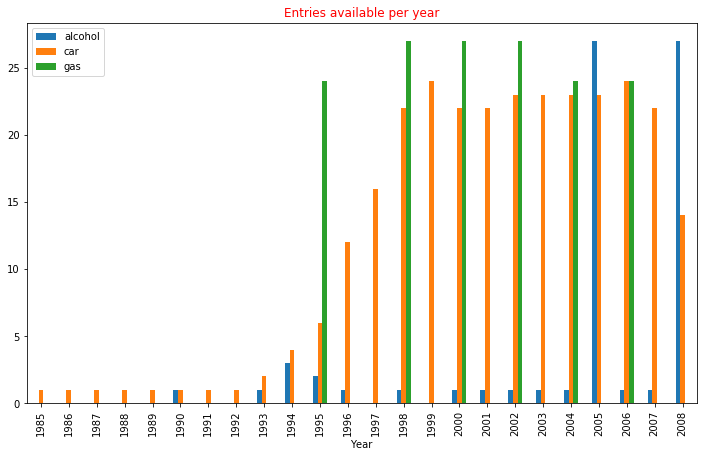

In [351]:
# count of entries for each dataset by year
EUdatafrYearcount=EUdatafrNoIn.groupby("Year").count()
display(EUdatafrYearcount.drop(columns=["Country"]))

# barplot of count of entries for each dataset by year
EUdatafrYearcount.drop(columns=["Country"]).plot.bar()
plt.title("Entries available per year", loc='center', fontsize=12, fontweight=0, color='red')
plt.xlabel("Year")

<a id='exploratoryI'></a>
## Exploratory Data Analysis I - Trends

Before proceeding with further data cleaning, we will perform some basic exploratory data analysis to understand the general trend of the selected indicators. This will also give some indication on how to proceed in terms of further data cleaning.
We will start with an overview of the overall trend for the car mortality (defined as cases per 100,000 inhabitants, age adjusted), starting from 1998, the year for which we start to have a significantly large sample. From the line plot we cannot recognize a distinct overall trend, even if the mean of the rate for each country is decreasing. It should however be noted that the mean value has be taken with caution, as it is calculated on a different pool of countries for each year, due to the inconsistencies in the availability of data.  

Text(0,0.5,'Deaths/100,000 in.')

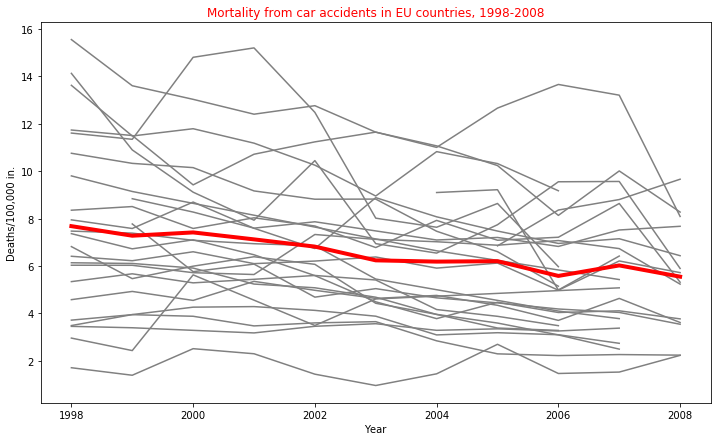

In [352]:
# we keep only the relevant column and we drop the nan 
EUcar=EUdatafrIn.drop(columns=["alcohol", "gas"]).dropna()

# we prepare a df with the mean values for comparison 
EUdatafrmean=EUdatafrIn.groupby(["Year"]).mean()

# lineplot
fig, ax = plt.subplots()
EUcar[EUcar["Year"]>1997].groupby('Country').plot(x='Year', y='car', ax=ax, legend=False, color="grey")
plt.plot(EUdatafrmean.car[EUdatafrmean.index>1997], color='red',linewidth=4)
plt.title("Mortality from car accidents in EU countries, 1998-2008", loc='center', fontsize=12, fontweight=0, color='red')
plt.xlabel("Year")
plt.ylabel("Deaths/100,000 in.")

It is perhaps more helpful to see the overall difference between the first year with data available (after 1998) and the last year with data available for each country. From the plot below we notice that in fact in most of the countries the mortality from car incidents has decreased in the period in question.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:87: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


Text(21.8,-95,'*')

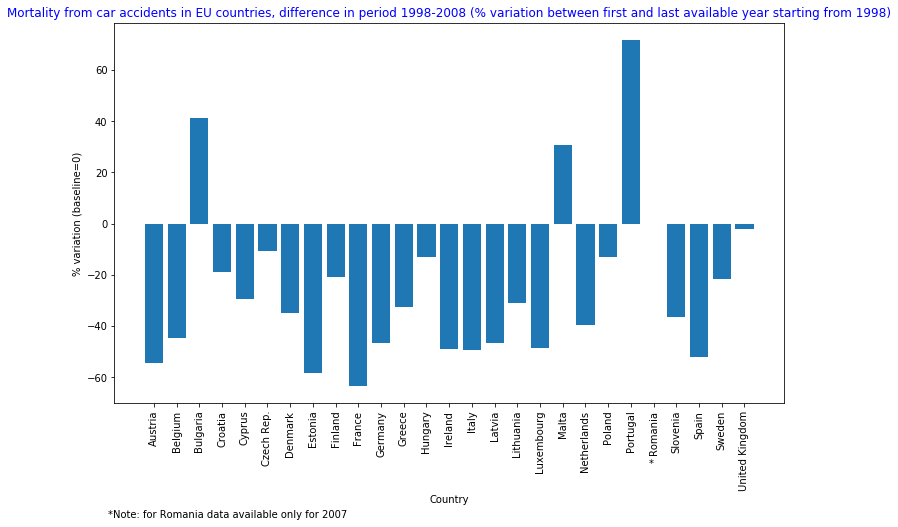

In [353]:
# identify the earliest and latest year with data available for each country (starting from 1998)
minyearcar=(EUcar[EUcar["Year"]>1997].groupby(EUcar[EUcar["Year"]>1997].index).min().Year)
maxyearcar=(EUcar.groupby(EUcar.index).max().Year)

# for ease of comparison between countries, we convert the rate to a percentage, with the the rate of the earliest year for each country (baseline) = 100
perccar=pd.Series([])
for i in EUcar.index.unique():
    df= EUcar.loc[EUcar.index==i]
    MinYear=minyearcar.loc[minyearcar.index==i]
    denom=df[df.Year==[MinYear[0]]].reset_index().car[0]
    vals=df.car/denom*100
    perccar=perccar.append(vals)

# merge the % data with the original df
EUcarperc=pd.concat([EUcar,perccar],axis=1)

# create two separate dataframes to store only the data for the earliest and the latest year
mincarsSeries=pd.Series([])
maxcarsSeries=pd.Series([])

for i in EUcarperc.index.unique():
    df=EUcarperc.loc[EUcarperc.index==i]
    MinYear=minyearcar.loc[minyearcar.index==i]
    MaxYear=maxyearcar.loc[maxyearcar.index==i]
    mincars=df[df.Year==[MinYear[0]]]
    maxcars=df[df.Year==[MaxYear[0]]]
    mincarsSeries=mincarsSeries.append(mincars)
    maxcarsSeries=maxcarsSeries.append(maxcars)

# create a series with only the difference between latest and earliest year for the barplot
minmax=(maxcarsSeries[0]-mincarsSeries[0])

# plot the % between earliest and latest year with a %
plt.bar(minmax.index, minmax)
plt.title("Mortality from car accidents in EU countries, difference in period 1998-2008 (% variation between first and last available year starting from 1998)", loc='center', fontsize=12, fontweight=0, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Country")
plt.ylabel("% variation (baseline=0)")
plt.text(-2,-115, '*Note: for Romania data available only for 2007',fontsize=10)
plt.text(21.8,-95, '*',fontsize=10)

On the other hand, gasoline prices evolution is consistent across countries and an overall trend easily recognizable, which is quite predictable given the influence of global oil prices on gasoline prices at the pump (in this case we plot the data starting from 1995). 

Text(0,0.5,'US$/l')

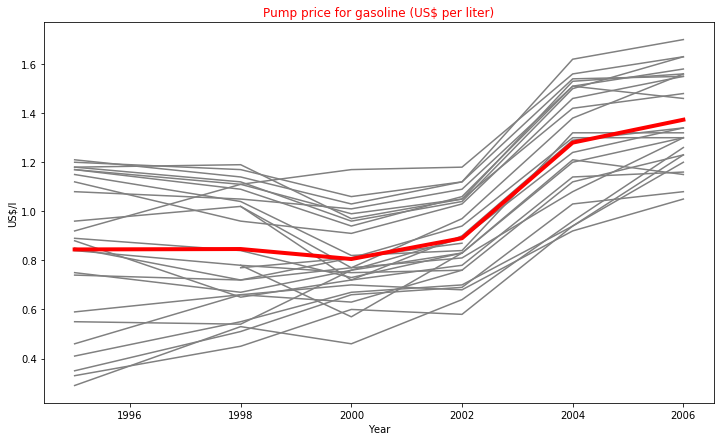

In [354]:
#we repeat the procedure to create a separate df for gasoline data and a line plot
EUgas=EUdatafrIn.drop(columns=["car", "alcohol"]).dropna()
fig, ax = plt.subplots()
EUgas.groupby('Country').plot(x='Year', y='gas', ax=ax, legend=False, color="grey")
plt.plot(EUdatafrmean.gas, color='red',linewidth=4)

#in this case we need to apply a mask to jump over the nan values in the mean dataframe
gasmask= np.isfinite(EUdatafrmean["gas"])
plt.plot(EUdatafrmean.gas[gasmask], color='red',linewidth=4)

plt.title("Pump price for gasoline (US$ per liter)", loc='center', fontsize=12, fontweight=0, color='red')
plt.xlabel("Year")
plt.ylabel("US$/l")

Finally, with regard to alcohol consumption, we have a significant amount of data only for two years, 2005 and 2008. Between these two years, there is overall stability. 

Text(0,0.5,'l/capita')

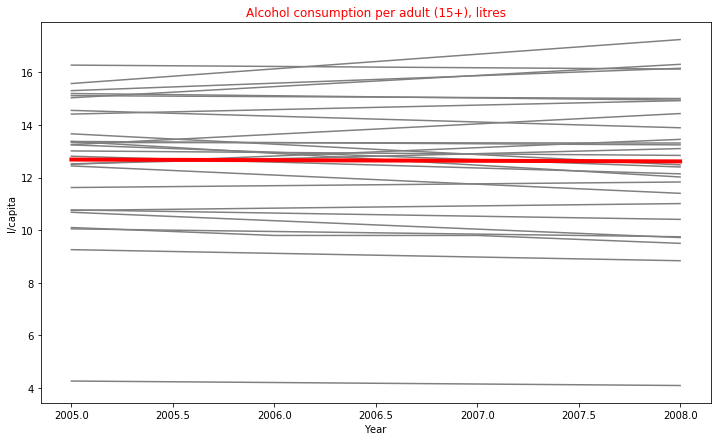

In [355]:
EUalcohol=EUdatafrIn.drop(columns=["car", "gas"]).dropna()
fig, ax = plt.subplots()
EUalcohol[EUalcohol["Year"]>2004].groupby('Country').plot(x='Year', y='alcohol', ax=ax, legend=False, color="grey")
plt.plot(EUdatafrmean.alcohol[EUdatafrmean.index.isin([2005,2008])], color='red',linewidth=4)

plt.title("Alcohol consumption per adult (15+), litres", loc='center', fontsize=12, fontweight=0, color='red')
plt.xlabel("Year")
plt.ylabel("l/capita")


As noted above, there is inconsistency between years for which we have data available. In particular, we have data for alcohol consumption from a significant number of countries only for 2005 and 2008.

In [356]:
display(EUdatafrNoIn.groupby("Year").count().tail(5))

,Country,alcohol,car,gas
Year,,,,
2004,27,1,23,24
2005,28,27,23,0
2006,27,1,24,24
2007,22,1,22,0
2008,28,27,14,0


This presents a problem as in order to investigate the relation between these two variables it would be necessary to compare data from the same year. 

As we have good data coverage for the car accidents mortality over the last few years (with the exception of 2008), a workaround is to identify a reference year for one of the two other datasets, and then identify for the others the closest available year.

We have opted to use data of gasoline prices from 2006, and to compare them with data  for car mortality and for alcohol consumption for the closest year (in most cases, 2006 for car accidents mortality and 2005 for alcohol consumption). We decided to use gasoline as the reference dataset as overall alcohol consumption hasn't change between 2005 and 2008 as much as gasoline prices have done between 2004 and 2006, as shown in the plots below. It is hence fair to assume that alcohol consumption didn't change drastically between 2005 and 2006. 

Text(0,0.5,'% variation (baseline=0)')

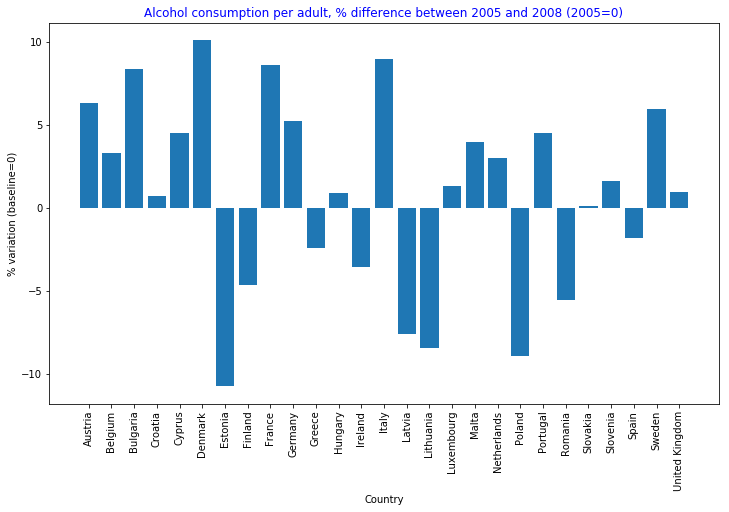

In [357]:
normal=pd.Series([])
for i in EUalcohol.index.unique():
    df= EUalcohol.loc[EUalcohol.index==i]
    denom=df[df["Year"]==2005].alcohol.reset_index().alcohol[0]
    vals=df.alcohol/denom*100
    normal=normal.append(vals)
    
    
EUalcoholnorm=pd.concat([EUalcohol,normal],axis=1)
EUalcoholminmax=EUalcoholnorm[EUalcoholnorm["Year"]==2005][0]-EUalcoholnorm[EUalcoholnorm["Year"]==2008][0]

plt.bar(EUalcoholminmax.index, EUalcoholminmax)


plt.title("Alcohol consumption per adult, % difference between 2005 and 2008 (2005=0)", loc='center', fontsize=12, fontweight=0, color='blue')
plt.xlabel("Country")
plt.xticks(rotation='vertical')
plt.ylabel("% variation (baseline=0)")

Text(0.5,0,'Country')

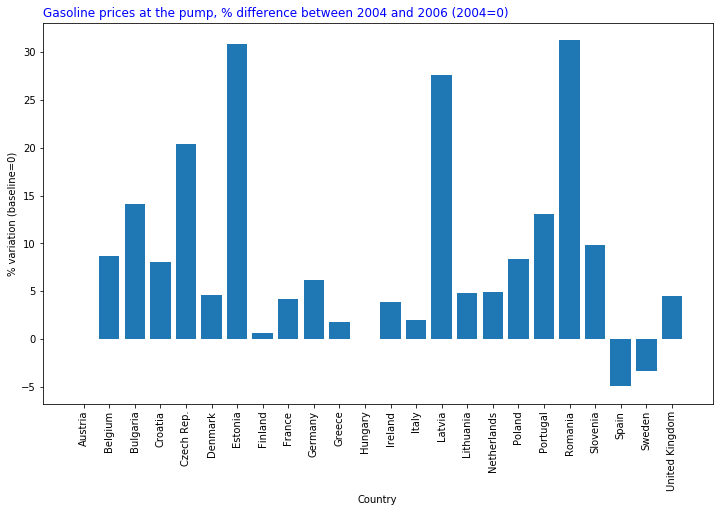

In [52]:
normal2=pd.Series([])
for i in EUgas[EUgas["Year"]==2004].index.unique():
    df= EUgas.loc[EUgas.index==i]
    denom=df[df["Year"]==2004].gas.reset_index().gas[0]
    vals=df.gas/denom*100
    normal2=normal2.append(vals)

EUgasfiltred=EUgas[EUgas.index.isin(normal2.index)]
EUgasnorm=pd.concat([EUgasfiltred,normal2],axis=1)

EUgasminmax=EUgasnorm[EUgasnorm["Year"]==2006][0]-EUgasnorm[EUgasnorm["Year"]==2004][0]
plt.bar(EUgasminmax.index, EUgasminmax)

plt.title("Gasoline prices at the pump, % difference between 2004 and 2006 (2004=0)", loc='center', fontsize=12, fontweight=0, color='blue')
plt.xticks(rotation="vertical")
plt.ylabel("% variation (baseline=0)")
plt.xlabel("Country")


<a id='datacleanII'></a>
## Further data cleaning - Year selection

We have then decided to use gasoline prices data from 2006. The next step is to identify the closest year  available for the other indicators. 

In [57]:
#we set 2006 as reference year
EUgasYear=EUgas[EUgas["Year"]==2006]

#we filter the alcohol and car accident mortality database based on the year value closest to 2006
EUalcohol["val_delt"] = (EUalcohol.Year - 2006).abs()
alcoholyears2ix = EUalcohol.reset_index().groupby("Country").apply(lambda EUalcohol:EUalcohol.val_delt.idxmin())
EUalcoholYear=EUalcohol.iloc[alcoholyears2ix]

EUcar["val_delt"] = (EUcar.Year - 2006).abs()
caryears2ix = EUcar.reset_index().groupby("Country").apply(lambda EUcar:EUcar.val_delt.idxmin())
EUcarYear=EUcar.iloc[caryears2ix]

# Visualize the year selected for each dataset 
frames=[EUcarYear.Year, EUalcoholYear.Year, EUgasYear.Year]
Years=pd.concat(frames, axis=1, keys=['car year', 'alcohol year', 'gas year'])
display(Years.groupby(Years.index).max())

,car year,alcohol year,gas year
Austria,2006.0,2005.0,2006.0
Belgium,2007.0,2005.0,2006.0
Bulgaria,2006.0,2005.0,2006.0
Croatia,2006.0,2005.0,2006.0
Cyprus,2006.0,2005.0,NaN
Czech Rep.,2006.0,NaN,2006.0
Denmark,2006.0,2005.0,2006.0
Estonia,2006.0,2005.0,2006.0
Finland,2006.0,2005.0,2006.0
France,2006.0,2005.0,2006.0


Although there is no perfect correspondence of years for some countries, for the sake of the present exercise the values are close enough to proceed with the analysis. However there are still some countries with no valid data for some indicators. We will exclude these from further analysis.

In [132]:
finalix=list(set(EUcarYear.index & set(EUalcoholYear.index) & set(EUgasYear.index)))

EUcarYear=EUcarYear.loc[finalix]
EUalcoholYear=EUalcoholYear.loc[finalix]
EUgasYear=EUgasYear.loc[finalix]

frames=[EUcarYear.Year, EUalcoholYear.Year, EUgasYear.Year]
Years=pd.concat(frames, axis=1, keys=['car year', 'alcohol year', 'gas year'])
display(Years.groupby(Years.index).max())

,car year,alcohol year,gas year
Country,,,
Austria,2006,2005,2006
Belgium,2007,2005,2006
Bulgaria,2006,2005,2006
Croatia,2006,2005,2006
Denmark,2006,2005,2006
Estonia,2006,2005,2006
Finland,2006,2005,2006
France,2006,2005,2006
Germany,2006,2005,2006


<a id='exploII'></a>
## Exploratory data analysis II 

### Distribution
Before proceeding with the analysis of correlation between the variables, we can take a look at the values we are going to use. This will give us a better understanding of the magnitude of the values, the differences between countries and help in identifying outliers. 

Text(0.5,1,'Mortality in car accidents, cases/100,000 inhabitants')

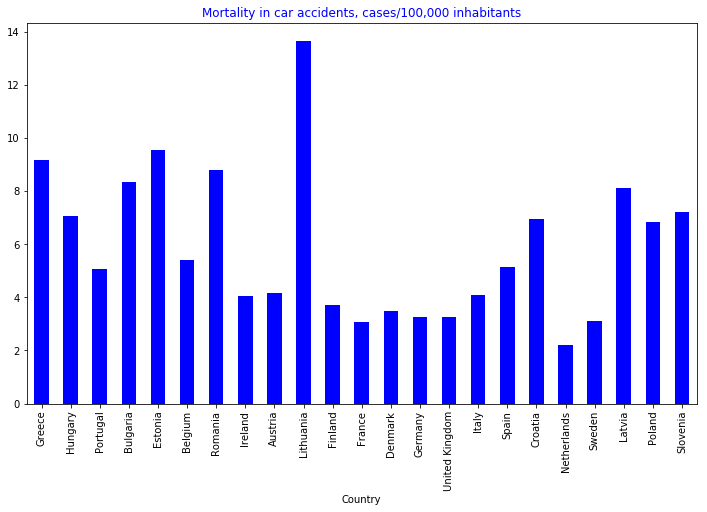

In [364]:
# barplot for car accidents mortality
EUcarYear.car.plot.bar(color="b")
plt.title("Mortality in car accidents, cases/100,000 inhabitants", loc='center', fontsize=12, fontweight=0, color='blue')

The data present an apparent outlier in Lithuania, which we should take into consideration while analyzing the correlation between variables.

Text(0.5,1,'Mortality in car accidents, range of cases/100,000 inhabitants')

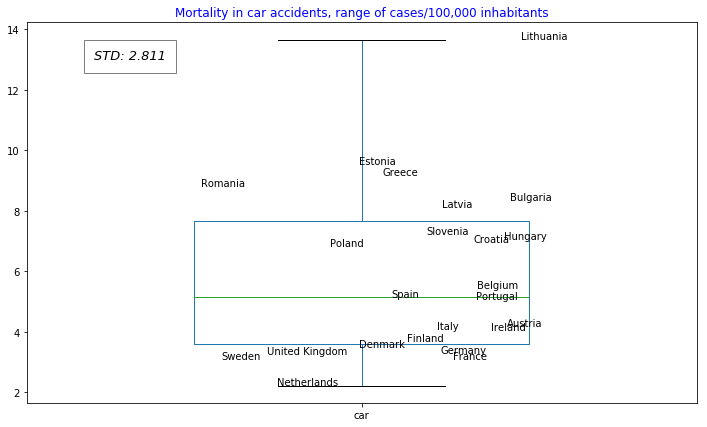

In [394]:
fig, ax = plt.subplots()
EUcarYear.car.plot.box(widths=.5)
for i in EUcarYear.index:
    ax.annotate(i, xy=(EUcarYear.car[i]*0+1+np.random.uniform(-0.25, 0.25), EUcarYear.car[i]))
SDcar=round((EUcarYear.car.std()),3)
plt.text(.6,13, "STD: " + str(SDcar),style='italic', size= 13,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

plt.title("Mortality in car accidents, range of cases/100,000 inhabitants", loc='center', fontsize=12, fontweight=0, color='blue')

    
#fig, ax = plt.subplots()
#for i, txt in enumerate(EUcarYear.index):
    #ax.annotate(txt, (EUcarYear.car*0+1,EUcarYear.car[i]))

Gasoline prices tend to have a less wide distibution - which is not surprising considering that the price is influenced by factors affecting all the countries considered.

Text(0.5,1,'Gasoline prices at the pump, USD')

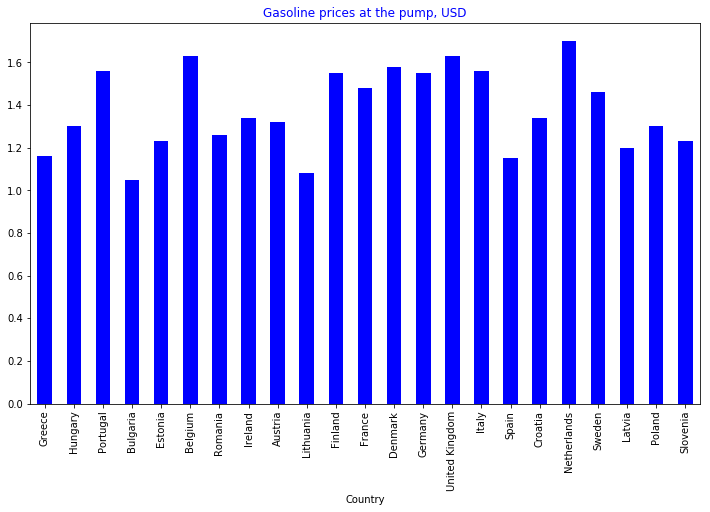

In [208]:
# barplot for gasoline prices
EUgasYear.gas.plot.bar(color="b")
EUgasYear.gas
plt.title("Gasoline prices at the pump, USD", loc='center', fontsize=12, fontweight=0, color='blue')


Text(0.5,1,'Gasoline prices at the pump, range of prices')

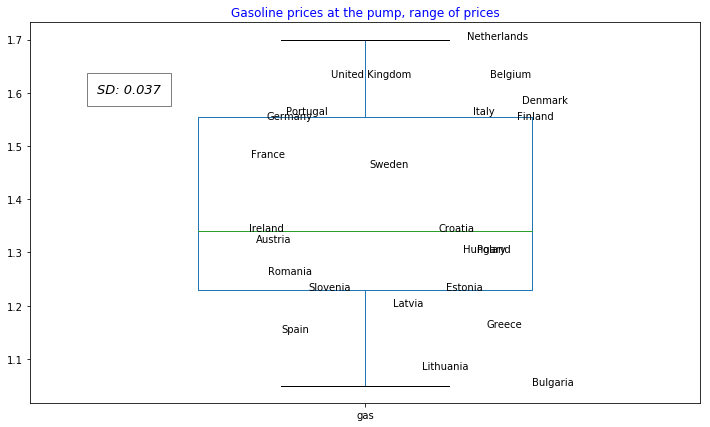

In [391]:
# boxplot of gasoline prices distribution
fig, ax = plt.subplots()
EUgasYear.gas.plot.box(widths=.5)
for i in EUgasYear.index:
    ax.annotate(i, xy=(EUgasYear.gas[i]*0+1+np.random.uniform(-0.25, 0.25), EUgasYear.gas[i]))
SDGas=round((EUgasYear.gas.std()),3)
plt.text(.6,1.6, "SD: " + str(varGas),style='italic', size= 13,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
plt.title("Gasoline prices at the pump, range of prices", loc='center', fontsize=12, fontweight=0, color='blue')

Alchol consumption values are mostly in the range 12-15 l/capita.

Text(0,1,'Alcohol consumption, l/capita')

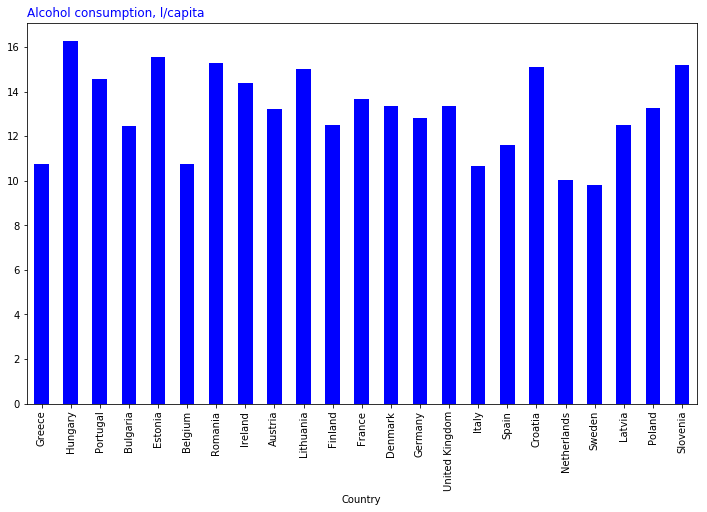

In [189]:
# barplot for alcohol consumption
EUalcoholYear.alcohol.plot.bar(color="b")
plt.title("Alcohol consumption, l/capita", loc='left', fontsize=12, fontweight=0, color='blue')


Text(0.5,1,'Alcohol consumption, range, l/capita')

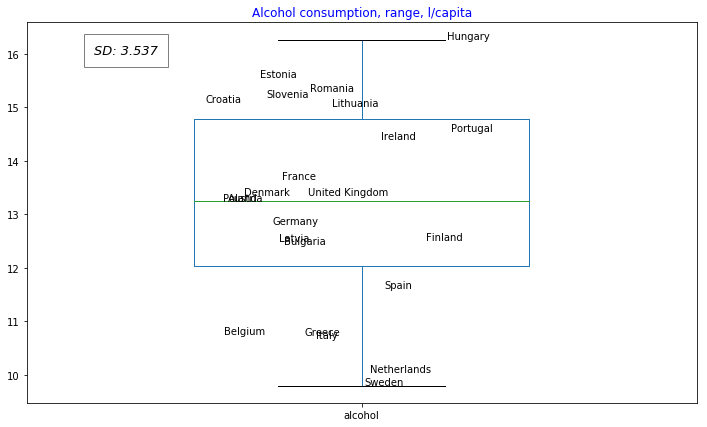

In [395]:
fig, ax = plt.subplots()
EUalcoholYear.alcohol.plot.box(widths=.5)
for i in EUalcoholYear.index:
    ax.annotate(i, xy=(EUalcoholYear.alcohol[i]*0+1+np.random.uniform(-0.25, 0.25), EUalcoholYear.alcohol[i]))
SDAlc=round((EUalcoholYear.alcohol.std()),3)
plt.text(.6,16, "SD: " + str(varAlc),style='italic', size= 13,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
plt.title("Alcohol consumption, range, l/capita", loc='center', fontsize=12, fontweight=0, color='blue')

We will proceed with some simple linear regression analysis to have a preliminary understanding of correlation between the indicators, in particular to see if alcohol consumption and gasoline prices could be good predictors for mortality in car accidents for the year we have selected above. We first proceed with identifying the R value and a visualization with a scatterplot of the gasoline prices vs mortality. 

Text(1.65,13,'R: -0.793')

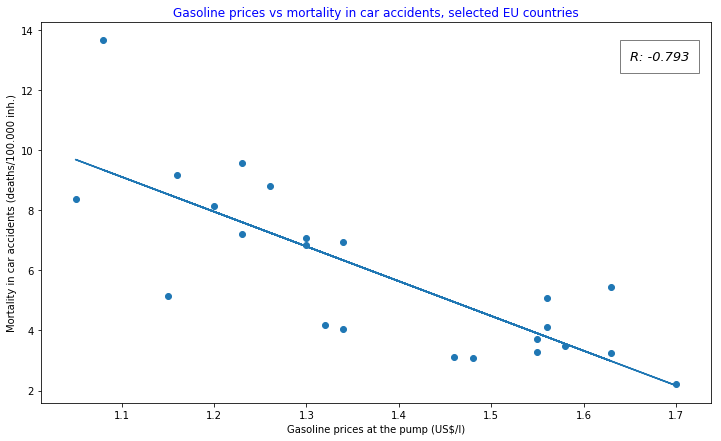

In [339]:
slope, intercept = np.polyfit(EUgasYear.gas, EUcarYear.car, 1)
CorrCarGas=np.corrcoef(EUgasYear.gas,EUcarYear.car)[0,1].round(3).astype(float)

plt.scatter(EUgasYear.gas, EUcarYear.car)
plt.plot(EUgasYear.gas, EUgasYear.gas*slope + intercept)
plt.title("Gasoline prices vs mortality in car accidents, selected EU countries", loc='center', fontsize=12, fontweight=0, color='blue')
plt.xlabel("Gasoline prices at the pump (US$/l)")
plt.ylabel("Mortality in car accidents (deaths/100.000 inh.)")
plt.text(1.65,13, "R: " + str(CorrCarGas),style='italic', size= 13,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

The correlation coefficient indicates that there is a pretty solid negative correlation between the two variables, with mortality decreasing as gasoline prices grow. This is confirmed from the regression analysis, with the mortality rate decreasing of 0.4 unit for every price increase of 0.1 US$: 

In [146]:
import statsmodels.api as sm

modelCarGas = sm.OLS(EUcarYear.car, EUgasYear.gas*10)
resultsCarGas = modelCarGas.fit()
display(resultsCarGas.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    car   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     58.69
Date:                Mon, 14 May 2018   Prob (F-statistic):           1.20e-07
Time:                        16:51:59   Log-Likelihood:                -60.797
No. Observations:                  23   AIC:                             123.6
Df Residuals:                      22   BIC:                             124.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gas            0.3999      0.052      7.661      0.000       0.292       0.508
==============================================================================
Omnibus:                        2.769   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                1.918
Skew:                           0.707   Prob(JB):                        0.383
Kurtosis:                       2.936   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on this analysis, gas prices seem to be a good predictor of mortality in car accidents.

Alcohol consumption and mortality in car accidents have a positive but weaker correlation (R = 0.436), that is also be influenced positively by an outlier (more precisely, Lithuania).

Text(9.8,13,'R: 0.436')

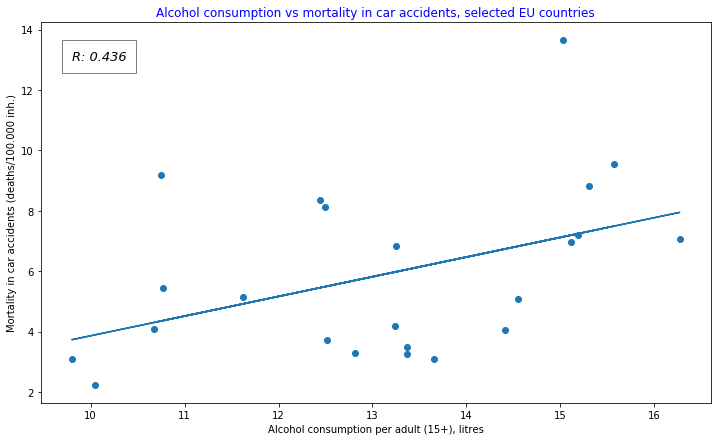

In [340]:
slope2, intercept2 = np.polyfit(EUalcoholYear.alcohol, EUcarYear.car, 1)
CorrCarAlc=np.corrcoef(EUalcoholYear.alcohol,EUcarYear.car)[0,1].round(3).astype(float)

plt.scatter(EUalcoholYear.alcohol, EUcarYear.car)
plt.plot(EUalcoholYear.alcohol, EUalcoholYear.alcohol*slope2 + intercept2)
plt.title("Alcohol consumption vs mortality in car accidents, selected EU countries", loc='center', fontsize=12, fontweight=0, color='blue')
plt.xlabel("Alcohol consumption per adult (15+), litres")
plt.ylabel("Mortality in car accidents (deaths/100.000 inh.)")
plt.text(9.8,13, "R: " + str(CorrCarAlc),style='italic', size= 13,
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})

A linear regression model seems to fit relatively well, with a R-squared of 0.853, and mortality increasing of .45 units for the increas of each liter of alcohol consumption. However the data show a slight sinusoidal distribution (as can be noted in the resiudal plot), and it is possible that a linear model is not the best option.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    car   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.3
Date:                Tue, 15 May 2018   Prob (F-statistic):           1.29e-10
Time:                        14:41:51   Log-Likelihood:                -53.720
No. Observations:                  23   AIC:                             109.4
Df Residuals:                      22   BIC:                             110.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.4534      0.040     11.282      0.000       0.370       0.537
==============================================================================
Omnibus:                        5.512   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                3.756
Skew:                           0.965   Prob(JB):                        0.153
Kurtosis:                       3.442   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Residuals')

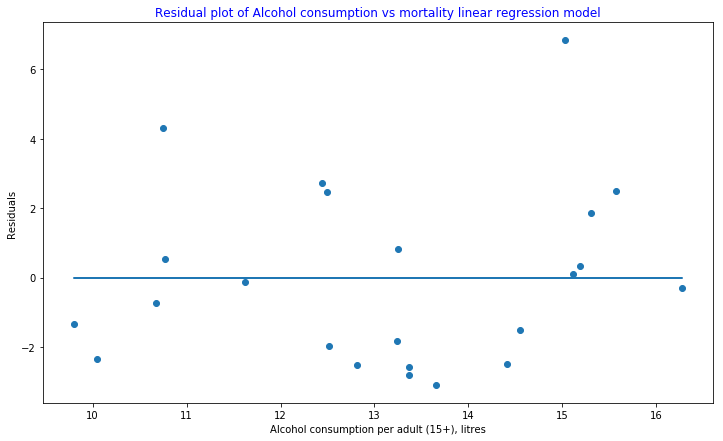

In [341]:
modelCarAlc = sm.OLS(EUcarYear.car, EUalcoholYear.alcohol)
resultsCarAlc = modelCarAlc.fit()
display(resultsCarAlc.summary())

plt.scatter(EUalcoholYear.alcohol,resultsCarAlc.resid)
plt.plot(EUalcoholYear.alcohol,resultsCarAlc.resid*0)

plt.title("Residual plot of Alcohol consumption vs mortality linear regression model", loc='center', fontsize=12, fontweight=0, color='blue')
plt.xlabel("Alcohol consumption per adult (15+), litres")
plt.ylabel("Residuals")

We finally perform a multiple regression analysis with both alcohol consumption and gasoline prices as predictors (this is easier done collecting the data in a single dataframe). This confirms the observations stated above.

In [153]:
# we merge the datasets in a single DF
frames=[EUalcoholYear.drop(["Year", "val_delt"], axis=1), EUgasYear.drop(["Year"], axis=1),EUcarYear.drop(["Year","val_delt"], axis=1)]
EUDF=pd.concat(frames, axis=1)

model3 = sm.OLS(endog=EUDF["car"], exog=EUDF[["alcohol", "gas"]])
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    car   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     91.92
Date:                Mon, 14 May 2018   Prob (F-statistic):           4.11e-11
Time:                        17:11:34   Log-Likelihood:                -49.547
No. Observations:                  23   AIC:                             103.1
Df Residuals:                      21   BIC:                             105.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.9076      0.154      5.904      0.000       0.588       1.227
gas           -4.4501      1.468     -3.031      0.006      -7.503      -1.397
==============================================================================
Omnibus:                        2.454   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.804
Skew:                           0.679   Prob(JB):                        0.406
Kurtosis:                       2.809   Cond. No.                         43.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='conclusions'></a>
## Conclusions

### Limitations

As noted above, given the nature of this exercise, any conclusion is purely tentative in nature. We have seen how missing values forced us to compare data between different years, which might negatively affect the quality of the analysis. Moreover, although we have restricted the analysis to the 28 EU countries, even in this sample we had missing values that forced us to exclude some countries from the analysis. Finally it should be rememebred that the regression analysis did not provide a longitudinal overview of the dataset, hence any result is relative to the years observed (namely between 2005 and 2007).

### Conclusion

From the data observed, we can affirm that:

1. There is a downward trend with regard to mortality in car accidents between 1998 and 2008 for countries that as of 2018 are part of the EU, and most of the countries have seen the rate decreasing over the period in analysis.
2. In 23 EU countries, according to data collected between 2005 and 2007, alcohol consumption and gasoline prices seem to be potentially good predictors for mortality in car accidents, with alcohol consumption being positevely correlated and gasoline prices negatively correlated to mortality. However, a linear model is not necessarily the best option to model the relationship between alcohol consumption and mortality in car accidents.

Possible further developments for this analysis could take into consideration the longitudinal dimension, analysing the historical evolution of the correlation between the trends (both within country and cross-country), as well as the role of other factors (like introduction of security measures, number of vehicles in country, % of paved roads, etc.).